- buy orders reflect in transactions before they are filled (cancelled visible)
- sell orders reflect in transaction after they are filled (cancelled not visible)

In [1]:
import pandas as pd
from pprint import pprint
from transactions import Transactions
import numpy as np

In [2]:
from eda_event_trades import EdaEventTrades

In [14]:
file = "log_files/order7_26.log"

In [48]:
orderdict_list = []
with open(file,"r") as f:
    for line in f:
        split_line = line.split(";")
        if len(split_line)>2:
            # print(line)
            # print(split_line)
            order_dict = {}
            order_dict["timestamp"] = pd.to_datetime(split_line[0][11:])
            order_dict["log"] = split_line[1].split(":")[1]
            order_dict["eid"] = int(split_line[2].split(":")[1])
            order_dict["call"] = str(split_line[3].split(":")[1])
            order_dict["type"] = str(split_line[4].split(":")[1])
            order_dict["order"] = str(split_line[5].split(":")[1])
            order_dict["asset"] = str(split_line[6].split(":")[1])
            order_dict["price"] = float(split_line[7].split(":")[1])
            qty = str(split_line[8].split(":")[1])
            if qty == "null":
                order_dict["qty"] = qty
            else:
                order_dict["qty"] = int(qty)
            order_dict["orderid"] = str(split_line[9].split(":")[1])
            order_dict["respmessage"] = str(split_line[10].split(":")[1])
            order_dict["message"] = str(split_line[11].split(":")[1])[:-1]
            # pprint(order_dict)
            orderdict_list.append(order_dict)
            # print("-"*50)
        else:
            print(line)
            print(split_line)
            print("-"*50)

INFO:order:2022-12-17 18:16:12,627;api call response not recorded

['INFO:order:2022-12-17 18:16:12,627', 'api call response not recorded\n']
--------------------------------------------------


In [49]:
orders_df = pd.DataFrame(orderdict_list)
orders_df[["m1","m2","m3","m4"]] = orders_df["message"].str.split(',',expand=True)

In [44]:
orders_df#.head()#["respmessage"]#.unique()

,timestamp,log,eid,call,type,order,asset,price,qty,orderid,respmessage,message,m1,m2,m3,m4
0,2022-12-17 15:31:54.365,pre,14093,sent,place,buy,Y,76,5,buysend,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
1,2022-12-17 15:31:55.921,post,14093,response,place,buy,Y,76,5,od_1671259060186350,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
2,2022-12-17 15:32:30.586,pre,14094,sent,place,buy,Y,63,5,buysend,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
3,2022-12-17 15:32:32.115,post,14094,response,place,buy,Y,63,5,od_1671259060186365,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
4,2022-12-17 15:33:36.400,pre,14096,sent,place,buy,Y,44,50,buysend,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
5,2022-12-17 15:33:37.870,post,14096,response,place,buy,Y,44,50,od_1671259060186411,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
6,2022-12-17 15:34:08.837,pre,14097,sent,place,buy,N,31,5,buysend,null,"NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1",NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1
7,2022-12-17 15:34:10.318,post,14097,response,place,buy,N,31,5,od_1671259060186425,null,"NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1",NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1
8,2022-12-17 15:34:41.224,pre,14098,sent,place,buy,N,51,5,buysend,null,"NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1",NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1
9,2022-12-17 15:34:42.710,post,14098,response,place,buy,N,51,5,od_1671259060186436,null,"NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1",NoSignalZeroHolding,ScalpingNo,BasicBuy,atbest+1


# Event Specific 

In [50]:
eid = 14094

In [51]:
Trans = Transactions(apitype="p",userid=0)
eid_trans = Trans.get_event_transactions(eid)
eid_trans["status"] = np.where(eid_trans["status"]=="Bought","buy",eid_trans["status"])
eid_trans["status"] = np.where(eid_trans["status"]=="Cancelled","cancel",eid_trans["status"])
eid_trans["status"] = np.where(eid_trans["status"]=="Sold","sell",eid_trans["status"])

initialising Transactions
initialising My bets


In [52]:
eid_trans.head()

,date,createdat,event_id,refid,amount,order_detail,status,qty,asset,price
2183,2022-12-18,2022-12-18 10:37:20.101000+05:30,14094,None,100.0,Settled (Rs. 99.00 credited),Settled,NaN,NaN,NaN
2731,2022-12-17,2022-12-17 23:00:18.372000+05:30,14094,None,372.0,Closed (Rs. 372.00 credited),Closed,NaN,NaN,NaN
2786,2022-12-17,2022-12-17 21:20:17.662000+05:30,14094,od_1671259060191516,-372.0,Bought 4.00 shares x Y (Rs. 93.00 each),buy,4.0,Y,93.0
2787,2022-12-17,2022-12-17 21:20:16.186000+05:30,14094,od_1671259060191442,356.0,Cancelled 4.00 shares x Y (Rs. 89.00 each),cancel,4.0,Y,89.0
2788,2022-12-17,2022-12-17 21:15:24.666000+05:30,14094,od_1671259060191442,-356.0,Bought 4.00 shares x Y (Rs. 89.00 each),buy,4.0,Y,89.0


In [53]:
eid_orderdf = orders_df[(orders_df["eid"]==eid)&(orders_df["log"]=="post")]
# eid_orderdf["orderid"] = [oid.split("_notsuccess")[0] if "_notsuccess" in oid else oid for oid in eid_orderdf["orderid"] ]
eid_orderdf["order"] = np.where(eid_orderdf["type"]=="cancel","cancel",eid_orderdf["order"])

In [54]:
eid_orderdf.columns = ['timestamp', 'log', 'eid', 'call', 'type', 'status', 'asset', 'price','qty', 'refid', 'respmessage','message', 'm1', 'm2', 'm3', 'm4']

In [55]:
eid_orderdf#.head()#["orderid"].str.split("_notsuccess")

,timestamp,log,eid,call,type,status,asset,price,qty,refid,respmessage,message,m1,m2,m3,m4
3,2022-12-17 15:32:32.115,post,14094,response,place,buy,Y,63.0,5,od_1671259060186365,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
57,2022-12-17 16:22:24.621,post,14094,response,cancel,cancel,Y,63.0,null,od_1671259060186365,null,"YesSignalZeroHolding,NewBuyParams",YesSignalZeroHolding,NewBuyParams,None,None
59,2022-12-17 16:22:26.165,post,14094,response,place,buy,Y,77.0,5,od_1671259060187010,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
131,2022-12-17 17:02:53.470,post,14094,response,cancel,cancel,Y,77.0,null,od_1671259060187010,null,"YesSignalZeroHolding,NewBuyParams",YesSignalZeroHolding,NewBuyParams,None,None
133,2022-12-17 17:02:54.958,post,14094,response,place,buy,Y,91.0,5,od_1671259060187470,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
148,2022-12-17 17:10:50.812,post,14094,response,cancel,cancel,Y,91.0,null,od_1671259060187470,null,Starting fresh,Starting fresh,None,None,None
150,2022-12-17 17:11:12.911,post,14094,response,place,buy,Y,92.0,5,od_1671259060187565,null,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
196,2022-12-17 17:25:44.639,post,14094,response,place,sell,Y,99.0,2,od_1671259060187757,null,"HoldYesQtyChange,SellingYesNewQty,ProfitSell,a...",HoldYesQtyChange,SellingYesNewQty,ProfitSell,atBetter
342,2022-12-17 18:44:39.408,post,14094,response,cancel,cancel,Y,99.0,null,od_1671259060187757,null,"HoldYesQtyChange,HoldQtyChange",HoldYesQtyChange,HoldQtyChange,None,None
344,2022-12-17 18:44:40.908,post,14094,response,place,sell,Y,96.0,3,od_1671259060189210,null,"HoldYesQtyChange,SellingYesNewQty,ProfitSell,a...",HoldYesQtyChange,SellingYesNewQty,ProfitSell,atBetter


In [58]:
eda_df = pd.merge(eid_trans,eid_orderdf[["refid","status","m1","m2","m3","m4"]],how = "outer",on=["refid","status"])
eda_df = eda_df.iloc[::-1]
eda_df["cumpnl"] = eda_df["amount"].cumsum()

In [59]:
eda_df

,date,createdat,event_id,refid,amount,order_detail,status,qty,asset,price,m1,m2,m3,m4,cumpnl
33,NaN,NaT,NaN,od_1671259060191439,NaN,NaN,cancel,NaN,NaN,NaN,YesFairPriceChange,PausingSell,None,None,NaN
32,NaN,NaT,NaN,od_1671259060191439,NaN,NaN,sell,NaN,NaN,NaN,HoldYesQtyChange,SellingYesNewQty,ProfitSell,atBetter,NaN
31,NaN,NaT,NaN,od_1671259060190403,NaN,NaN,cancel,NaN,NaN,NaN,SituationChange,NewSellParams,None,None,NaN
30,NaN,NaT,NaN,od_1671259060190403,NaN,NaN,sell,NaN,NaN,NaN,YesFairPriceChange,SellingBoughtQty,ProfitSell,atAvgBuy+1,NaN
29,NaN,NaT,NaN,od_1671259060190317,NaN,NaN,cancel,NaN,NaN,NaN,YesFairPriceChange,NewSellParams,None,None,NaN
28,NaN,NaT,NaN,od_1671259060190317,NaN,NaN,sell,NaN,NaN,NaN,NoFairPriceChange,SellingBoughtQty,ProfitSell,atBetter,NaN
27,NaN,NaT,NaN,od_1671259060190244,NaN,NaN,cancel,NaN,NaN,NaN,NoFairPriceChange,NewSellParams,None,None,NaN
26,NaN,NaT,NaN,od_1671259060190244,NaN,NaN,sell,NaN,NaN,NaN,HoldYesQtyChange,SellingYesNewQty,ProfitSell,atBetter,NaN
25,NaN,NaT,NaN,od_1671259060189210,NaN,NaN,cancel,NaN,NaN,NaN,HoldYesQtyChange,HoldQtyChange,None,None,NaN
24,NaN,NaT,NaN,od_1671259060189210,NaN,NaN,sell,NaN,NaN,NaN,HoldYesQtyChange,SellingYesNewQty,ProfitSell,atBetter,NaN


# Strat Recorded Data

In [60]:
import pymongo as pm

In [61]:
def get_event_strat_data(event_id):
    client = pm.MongoClient("localhost", 27017)
    db = client.tradex_strat_data
    collection = db[f"strat7_{event_id}_0"]
    cursor = collection.find({"_id" : { "$ne" : "info"},
                             },{"_id":0})
    df = pd.DataFrame(cursor)
    return df

In [67]:
strat_df = get_event_strat_data(14094)
strat_df = strat_df.set_index("timestamp")

In [68]:
strat_df.columns

Index(['side_2_scalp', 'spot_price', 'strike_price', 'atr_value', 'getOutdiff',
       'yes_getout', 'no_getout', 'yesfp', 'nofp', 'yesefp', 'noefp', 'yesbp',
       'nobp', 'yesobvwap', 'noobvwap', 'yes2ndbp', 'no2ndbp', 'yesabp',
       'noabp', 'yesasp', 'noasp', 'yesholdqty', 'noholdqty', 'maxbuyqty',
       'orders'],
      dtype='object')

In [69]:
strat_df.head()

,side_2_scalp,spot_price,strike_price,atr_value,getOutdiff,yes_getout,no_getout,yesfp,nofp,yesefp,...,yes2ndbp,no2ndbp,yesabp,noabp,yesasp,noasp,yesholdqty,noholdqty,maxbuyqty,orders
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-17 15:32:34.581,Y,16694,16460,407.882806,dynamic,5.0,5.0,49.101333,7.296328,78.111016,...,25.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,"[{'index': 0, 'status': 'pending', 'price': 63..."
2022-12-17 15:36:49.399,Y,16692,16460,407.882806,dynamic,5.0,5.0,48.668226,7.376416,77.870751,...,25.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,"[{'index': 0, 'status': 'pending', 'price': 63..."
2022-12-17 15:41:56.151,Y,16688,16460,407.882806,dynamic,5.0,5.0,48.508050,7.536593,77.390221,...,25.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,"[{'index': 0, 'status': 'pending', 'price': 63..."
2022-12-17 15:47:12.031,Y,16699,16460,407.882806,dynamic,5.0,5.0,48.948536,7.096107,78.711679,...,25.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,"[{'index': 0, 'status': 'pending', 'price': 63..."
2022-12-17 15:52:16.107,Y,16704,16460,407.882806,dynamic,5.0,5.0,49.148757,6.895886,79.312341,...,25.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,5.0,"[{'index': 0, 'status': 'pending', 'price': 63..."


In [ ]:
strat_df[['timestamp', 'side_2_scalp', 'spot_price', 'strike_price', 'atr_value',
       'getOutdiff', 'yes_getout', 'no_getout', 'yesfp', 'nofp', 'yesefp',
       'noefp', 'yesbp', 'nobp', 'yesobvwap', 'noobvwap', 'yes2ndbp',
       'no2ndbp', 'yesabp', 'noabp', 'yesasp', 'noasp', 'yesholdqty',
       'noholdqty', 'maxbuyqty', 'orders']].plot()

In [72]:
strat_df1 = strat_df.copy()
strat_df1['side_2_scalp'] = np.where(strat_df1['side_2_scalp']=="Y",1,0)

<AxesSubplot:xlabel='timestamp'>

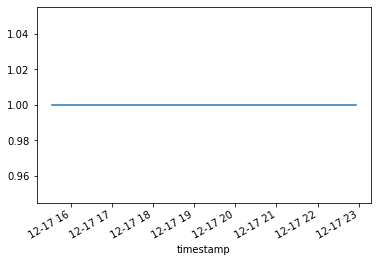

In [73]:
strat_df1["side_2_scalp"].plot()

<AxesSubplot:xlabel='timestamp'>

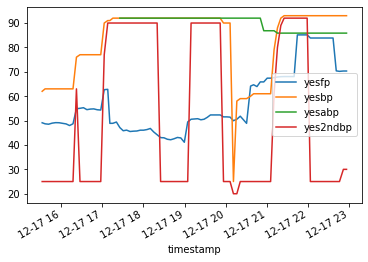

In [76]:
strat_df1[["yesfp","yesbp","yesabp","yes2ndbp"]].plot()

# Rough 

In [83]:
eda = EdaEventTrades(13984)

API type: Test or Production (t/p)?:  p
Enter userid (0 for default):  0


initialising Transactions


API type: Test or Production (t/p)?:  p
Enter userid (0 for default):  0


initialising My bets
my bets apitype is None


API type: Test or Production (t/p)?:  p
Enter userid (0 for default):  0


In [84]:
eda.df

,date,createdat,event_id,refid,amount,order_detail,status,qty,asset,price
0,2022-12-15,2022-12-15 17:26:59.048000+05:30,13984,od_1671038145062743,-0.0,Bought 5.00 shares x N (Rs. 35.00 each),Bought,0.0,N,35.0
1,2022-12-15,2022-12-15 17:50:55.925000+05:30,13984,od_1671038145062743,0.0,Cancelled 5.00 shares x N (Rs. 35.00 each),Cancelled,-5.0,N,35.0
2,2022-12-15,2022-12-15 17:55:45.837000+05:30,13984,od_1671038145063203,-0.0,Bought 10.00 shares x Y (Rs. 37.00 each),Bought,0.0,Y,37.0
3,2022-12-15,2022-12-15 18:00:42.304000+05:30,13984,od_1671038145063203,0.0,Cancelled 10.00 shares x Y (Rs. 37.00 each),Cancelled,-10.0,Y,37.0
4,2022-12-15,2022-12-15 18:00:43.815000+05:30,13984,od_1671038145063319,-630.0,Bought 15.00 shares x Y (Rs. 42.00 each),Bought,15.0,Y,42.0
5,2022-12-15,2022-12-15 18:05:36.740000+05:30,13984,od_1671038145063439,-28.0,Bought 5.00 shares x Y (Rs. 28.00 each),Bought,1.0,Y,28.0
6,2022-12-15,2022-12-15 18:06:54.073000+05:30,13984,od_1671038145063436,420.0,Sold 15.00 shares x Y (Rs. 28.00 each),Sold,15.0,Y,28.0
7,2022-12-15,2022-12-15 18:10:24.295000+05:30,13984,od_1671038145063439,0.0,Cancelled 4.00 shares x Y (Rs. 28.00 each),Cancelled,-4.0,Y,28.0
8,2022-12-15,2022-12-15 18:10:25.755000+05:30,13984,od_1671038145063563,-1008.0,Bought 24.00 shares x Y (Rs. 42.00 each),Bought,24.0,Y,42.0
9,2022-12-15,2022-12-15 18:20:07.293000+05:30,13984,od_1671038145063792,55.0,Sold 5.00 shares x Y (Rs. 11.00 each),Sold,5.0,Y,11.0


In [90]:
orders_df["eid"].unique()

array([13986, 13977, 13987, 13985, 13978, 13979, 13984, 13983],
      dtype=int64)

In [92]:
orders_df[orders_df["eid"]==13978]

,timestamp,log,eid,call,type,order,asset,price,qty,orderid,message,m1,m2,m3,m4
14,2022-12-15 17:00:53.857,pre,13978,sent,place,buy,Y,51,5,buysend,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
15,2022-12-15 17:00:55.319,post,13978,response,place,buy,Y,51,5,od_1671038145062310,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
20,2022-12-15 17:05:50.956,pre,13978,sent,cancel,buy,Y,51,null,od_1671038145062310,"YesSignalZeroHolding,NewBuyParams",YesSignalZeroHolding,NewBuyParams,None,None
21,2022-12-15 17:05:52.451,post,13978,response,cancel,buy,Y,51,null,od_1671038145062310_notsuccess,"YesSignalZeroHolding,NewBuyParams",YesSignalZeroHolding,NewBuyParams,None,None
22,2022-12-15 17:05:52.452,pre,13978,sent,place,buy,Y,76,5,buysend,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
23,2022-12-15 17:05:53.904,post,13978,response,place,buy,Y,76,5,od_1671038145062396,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
52,2022-12-15 17:30:27.166,pre,13978,sent,cancel,buy,Y,76,null,od_1671038145062396,"NoSignalZeroHolding,CancelOppSideOrders",NoSignalZeroHolding,CancelOppSideOrders,None,None
53,2022-12-15 17:30:28.644,post,13978,response,cancel,buy,Y,76,null,od_1671038145062396_notsuccess,"NoSignalZeroHolding,CancelOppSideOrders",NoSignalZeroHolding,CancelOppSideOrders,None,None
196,2022-12-15 18:42:38.964,pre,13978,sent,place,buy,Y,51,5,buysend,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
197,2022-12-15 18:42:40.456,post,13978,response,place,buy,Y,51,5,od_1671038145064407,"YesSignalZeroHolding,ScalpingYes,BasicBuy,atbe...",YesSignalZeroHolding,ScalpingYes,BasicBuy,atbest+1
